In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from tqdm import tqdm  # 用于显示进度条

In [5]:
# 设置数据集路径(改成你的实际路径)
DATASET_PATH = "../../gesture recognition/leapGestRecog"  # 改成你的路径

# 设置参数
TARGET_SIZE = (96, 96)  # 目标图片大小
NUM_CLASSES = 8        # 类别数
TRAIN_RATIO = 0.7      # 训练集比例
CAL_RATIO = 0.15        # 校准集比例
TEST_RATIO = 0.15       # 测试集比例

# 类别名称映射(方便后续使用)
CLASS_NAMES = {
    '00': 'palm',
    '01': 'l',
    '02': 'fist',
    '03': 'thumb',    # 原来是'04'
    '04': 'index',    # 原来是'05'
    '05': 'ok',       # 原来是'06'
    '06': 'c',        # 原来是'08'
    '07': 'down'      # 原来是'09'
}

In [6]:
def preprocess_image(image_path):
    """
    图片预处理函数
    1. 读取图片
    2. 转换为灰度图
    3. 调整大小
    4. 归一化
    """
    # 读取图片
    img = cv2.imread(image_path)
    # 转换为灰度图
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 调整大小
    resized = cv2.resize(gray, TARGET_SIZE)
    # 归一化
    normalized = resized.astype('float32') / 255.0
    
    return normalized

def augment_image(image):
    """
    数据增强函数
    1. 随机旋转
    2. 随机缩放
    3. 随机亮度调整
    """
    # 这里先返回原图,后面我们再添加增强
    return image

# 测试函数是否正常工作
test_img_path = os.path.join(DATASET_PATH, "00", "01_palm", "frame_00_01_0001.png")
if os.path.exists(test_img_path):
    test_result = preprocess_image(test_img_path)
    print("预处理函数测试成功!")
    print("处理后图片形状:", test_result.shape)

预处理函数测试成功!
处理后图片形状: (96, 96)


In [7]:
def collect_data():
    """收集并处理所有图片数据"""
    images = []
    labels = []
    gesture_folders = ['01_palm', '02_l', '03_fist', '05_thumb', 
                      '06_index', '07_ok', '09_c', '10_down']
    
    gesture_to_label = {
        '01_palm': 0,
        '02_l': 1,
        '03_fist': 2,
        '05_thumb': 3,
        '06_index': 4,
        '07_ok': 5,
        '09_c': 6,
        '10_down': 7
    }
    
    # 遍历所有数字文件夹
    for class_dir in [f"{i:02d}" for i in range(10)]:
        class_path = os.path.join(DATASET_PATH, class_dir)
        
        # 遍历目标手势文件夹
        for gesture_folder in gesture_folders:
            gesture_path = os.path.join(class_path, gesture_folder)
            if not os.path.exists(gesture_path):
                continue
                
            print(f"处理文件夹 {class_dir}: {gesture_folder}")
            
            for img_name in tqdm(os.listdir(gesture_path)):
                if img_name.endswith('.png'):
                    img_path = os.path.join(gesture_path, img_name)
                    processed_img = preprocess_image(img_path)
                    images.append(processed_img)
                    labels.append(gesture_to_label[gesture_folder])
    
    return np.array(images), np.array(labels)

# 执行数据收集
print("开始收集和处理数据...")
images, labels = collect_data()  # 保存返回值
print("\n数据收集完成!")
print("总图片数量:", len(images))
print("总标签数量:", len(labels))

开始收集和处理数据...
处理文件夹 00: 01_palm


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 152.71it/s]


处理文件夹 00: 02_l


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 252.76it/s]


处理文件夹 00: 03_fist


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 132.88it/s]


处理文件夹 00: 05_thumb


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 184.83it/s]


处理文件夹 00: 06_index


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 162.91it/s]


处理文件夹 00: 07_ok


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 256.08it/s]


处理文件夹 00: 09_c


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 309.67it/s]


处理文件夹 00: 10_down


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 168.28it/s]


处理文件夹 01: 01_palm


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 386.77it/s]


处理文件夹 01: 02_l


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 312.52it/s]


处理文件夹 01: 03_fist


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 341.35it/s]


处理文件夹 01: 05_thumb


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 307.61it/s]


处理文件夹 01: 06_index


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 318.10it/s]


处理文件夹 01: 07_ok


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 311.85it/s]


处理文件夹 01: 09_c


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 303.54it/s]


处理文件夹 01: 10_down


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 202.33it/s]


处理文件夹 02: 01_palm


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 227.40it/s]


处理文件夹 02: 02_l


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 192.41it/s]


处理文件夹 02: 03_fist


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 303.88it/s]


处理文件夹 02: 05_thumb


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 290.76it/s]


处理文件夹 02: 06_index


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 378.17it/s]


处理文件夹 02: 07_ok


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 298.27it/s]


处理文件夹 02: 09_c


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 268.77it/s]


处理文件夹 02: 10_down


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 291.70it/s]


处理文件夹 03: 01_palm


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 322.91it/s]


处理文件夹 03: 02_l


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 298.46it/s]


处理文件夹 03: 03_fist


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 334.86it/s]


处理文件夹 03: 05_thumb


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 318.30it/s]


处理文件夹 03: 06_index


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 393.24it/s]


处理文件夹 03: 07_ok


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 185.08it/s]


处理文件夹 03: 09_c


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 152.27it/s]


处理文件夹 03: 10_down


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 190.72it/s]


处理文件夹 04: 01_palm


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 266.23it/s]


处理文件夹 04: 02_l


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 287.81it/s]


处理文件夹 04: 03_fist


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 275.24it/s]


处理文件夹 04: 05_thumb


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 212.41it/s]


处理文件夹 04: 06_index


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 132.71it/s]


处理文件夹 04: 07_ok


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 318.43it/s]


处理文件夹 04: 09_c


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 281.18it/s]


处理文件夹 04: 10_down


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 325.04it/s]


处理文件夹 05: 01_palm


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 284.13it/s]


处理文件夹 05: 02_l


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 395.34it/s]


处理文件夹 05: 03_fist


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 224.92it/s]


处理文件夹 05: 05_thumb


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 156.51it/s]


处理文件夹 05: 06_index


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 225.48it/s]


处理文件夹 05: 07_ok


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 263.93it/s]


处理文件夹 05: 09_c


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 363.41it/s]


处理文件夹 05: 10_down


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 290.94it/s]


处理文件夹 06: 01_palm


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 338.99it/s]


处理文件夹 06: 02_l


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 145.87it/s]


处理文件夹 06: 03_fist


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 256.28it/s]


处理文件夹 06: 05_thumb


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 255.37it/s]


处理文件夹 06: 06_index


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 281.04it/s]


处理文件夹 06: 07_ok


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 281.26it/s]


处理文件夹 06: 09_c


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 248.15it/s]


处理文件夹 06: 10_down


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 315.74it/s]


处理文件夹 07: 01_palm


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 168.08it/s]


处理文件夹 07: 02_l


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 320.62it/s]


处理文件夹 07: 03_fist


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 314.56it/s]


处理文件夹 07: 05_thumb


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 187.02it/s]


处理文件夹 07: 06_index


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 278.53it/s]


处理文件夹 07: 07_ok


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 227.63it/s]


处理文件夹 07: 09_c


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 153.93it/s]


处理文件夹 07: 10_down


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 171.59it/s]


处理文件夹 08: 01_palm


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 169.98it/s]


处理文件夹 08: 02_l


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 240.73it/s]


处理文件夹 08: 03_fist


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 205.18it/s]


处理文件夹 08: 05_thumb


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 295.74it/s]


处理文件夹 08: 06_index


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 179.69it/s]


处理文件夹 08: 07_ok


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 170.23it/s]


处理文件夹 08: 09_c


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 212.64it/s]


处理文件夹 08: 10_down


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 261.49it/s]


处理文件夹 09: 01_palm


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 347.94it/s]


处理文件夹 09: 02_l


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 382.48it/s]


处理文件夹 09: 03_fist


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 206.66it/s]


处理文件夹 09: 05_thumb


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 186.55it/s]


处理文件夹 09: 06_index


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 255.77it/s]


处理文件夹 09: 07_ok


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 299.36it/s]


处理文件夹 09: 09_c


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 325.70it/s]


处理文件夹 09: 10_down


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 252.36it/s]



数据收集完成!
总图片数量: 16000
总标签数量: 16000


In [8]:
def split_and_save_data(images, labels):
    """划分数据集并保存"""
    # 首先分出测试集
    X_temp, X_test, y_temp, y_test = train_test_split(
        images, labels, 
        test_size=TEST_RATIO, 
        random_state=42,
        stratify=labels
    )
    
    # 从剩余数据中分出校准集
    X_train, X_cal, y_train, y_cal = train_test_split(
        X_temp, y_temp,
        test_size=CAL_RATIO/(TRAIN_RATIO + CAL_RATIO),
        random_state=42,
        stratify=y_temp
    )
    
    return {
        'train': (X_train, y_train),
        'cal': (X_cal, y_cal),
        'test': (X_test, y_test)
    }

# 执行数据集划分
datasets = split_and_save_data(images, labels)
print("数据集划分完成!")

数据集划分完成!


In [9]:
def verify_data(name, X, y):
    """验证数据对应关系"""
    print(f"\n验证{name}数据集:")
    # 1. 检查长度是否相等
    assert len(X) == len(y), f"{name}数据集中X和y长度不一致!"
    print(f"数据集大小: {len(X)}")
    
    # 2. 检查每个类别的数量
    for i in range(NUM_CLASSES):
        count = np.sum(y == i)
        print(f"类别{i} ({CLASS_NAMES[f'{i:02d}']}): {count}张图片")
    
    return True

# 验证所有数据集
for name, (X, y) in datasets.items():
    verify_data(name, X, y)


验证train数据集:
数据集大小: 11200
类别0 (palm): 1400张图片
类别1 (l): 1400张图片
类别2 (fist): 1400张图片
类别3 (thumb): 1400张图片
类别4 (index): 1400张图片
类别5 (ok): 1400张图片
类别6 (c): 1400张图片
类别7 (down): 1400张图片

验证cal数据集:
数据集大小: 2400
类别0 (palm): 300张图片
类别1 (l): 300张图片
类别2 (fist): 300张图片
类别3 (thumb): 300张图片
类别4 (index): 300张图片
类别5 (ok): 300张图片
类别6 (c): 300张图片
类别7 (down): 300张图片

验证test数据集:
数据集大小: 2400
类别0 (palm): 300张图片
类别1 (l): 300张图片
类别2 (fist): 300张图片
类别3 (thumb): 300张图片
类别4 (index): 300张图片
类别5 (ok): 300张图片
类别6 (c): 300张图片
类别7 (down): 300张图片


In [10]:
# 保存验证后的数据集
for name, (X, y) in datasets.items():
    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump((X, y), f)
    print(f'\n{name}.pkl 保存成功!')

print("\n所有数据处理和保存完成!")


train.pkl 保存成功!

cal.pkl 保存成功!

test.pkl 保存成功!

所有数据处理和保存完成!


In [11]:
# 加载数据示例
with open('train.pkl', 'rb') as f:
    X_train, y_train = pickle.load(f)
    
with open('cal.pkl', 'rb') as f:
    X_cal, y_cal = pickle.load(f)
    
with open('test.pkl', 'rb') as f:
    X_test, y_test = pickle.load(f)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (11200, 96, 96)
y_train shape: (11200,)


数据类型: float32
数据范围: 0.0 - 0.99607843
数据形状: (11200, 96, 96)
添加通道维度后的形状: (11200, 96, 96, 1)


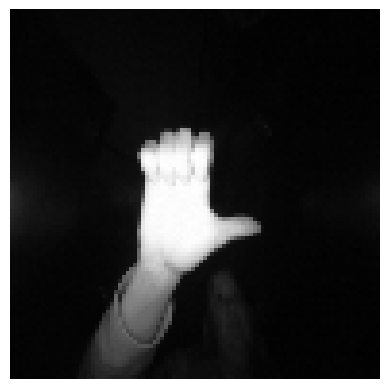

In [13]:
# 加载并验证数据格式
with open('train.pkl', 'rb') as f:
    X_train, y_train = pickle.load(f)

print("数据类型:", X_train.dtype)  # 应该是 float32
print("数据范围:", X_train.min(), "-", X_train.max())  # 应该是 0-1
print("数据形状:", X_train.shape)  # (15999, 96, 96)

# 如果需要添加通道维度，可以这样做：
X_train_with_channel = X_train[..., np.newaxis]
print("添加通道维度后的形状:", X_train_with_channel.shape)  # (15999, 96, 96, 1)

# 显示一张图片看看是否正确
import matplotlib.pyplot as plt
plt.imshow(X_train[1500], cmap='gray')
plt.axis('off')
plt.show()